# Description

We now investigate how many women are likely to die within the first 350 months. This is done simulating 200 women for 350 iterations 100 times. Each time, the fraction of dead women (how many women are in stage 5?) is saved in a vector. Below is the main code and a histogram of the fractions and the variance of dead fractions. 

In [4]:
# Initialization
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

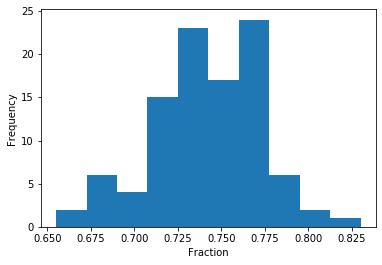

Mean dead fraction after 350 months: 0.7409
Variance of dead fraction after 350 months: 0.0009866900000000008


In [17]:
P = np.array([[0.9915, 0.005, 0.0025, 0, 0.001],
              [0, 0.986, 0.005, 0.004, 0.005], 
              [0, 0, 0.992, 0.003, 0.005],
              [0, 0, 0, 0.991, 0.009],
              [0, 0, 0, 0, 1]])

max_state = 5
n_women = 200      #### Changed from task 1
states = np.arange(1,max_state+1)

#### NEW FOR TASK 5 #####
simulations = 100
simulated_months = 350
dead_fraction_350 = np.zeros(simulations)
lifetime_mean_350 = np.zeros(simulations)
#########################

for r in range(simulations): ####
    women_states = np.ones(n_women)   ####    
    lifetime = np.zeros(n_women)      ####
    
    # Run until max_state is reached for all individuals
    #while np.min(women_states) < max_state:
    for m in range(simulated_months): ####

        # Make temporary vector with women's states
        new_women_states = women_states

        # Update states
        for i in range(1, int(np.max(women_states)) + 1):
            index_state = np.where(women_states == i)[0]
            new_women_states[index_state] = np.random.choice(states, size = len(index_state), p = P[i-1,:])
        women_states = new_women_states

        # Update liftime
        index_lifetime = np.where(women_states < max_state)[0]
        lifetime[index_lifetime] += 1

        #print("State:\t\t", women_states, )
        #print("Lifetime:\t",lifetime)
        #print("\n")
        
    # Record dead fraction and lifetime means
    dead_fraction_350[r] = len(women_states[women_states == max_state])/n_women ####
    lifetime_mean_350[r] = np.mean(lifetime)
    
# Histogram of dead fractions
plt.hist(dead_fraction_350, bins = 10)
plt.xlabel('Fraction')
plt.ylabel('Frequency')
plt.show()

# Variance
variance_dead = np.var(dead_fraction_350)
print('Mean dead fraction after 350 months:', np.mean(dead_fraction_350))
print('Variance of dead fraction after 350 months:', np.var(dead_fraction_350))

We now try to reduce this variance by using mean lifetime after surgery as a control variate. Lifetime mean is distributed as shown below:

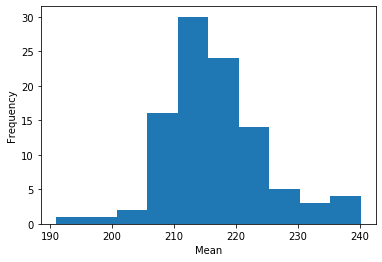

In [13]:
# Histogram of dead fractions
plt.hist(lifetime_mean_350, bins = 10)
plt.xlabel('Mean')
plt.ylabel('Frequency')
plt.show()

When using the lifetime mean as control variate, we first calculate c as

$$ c = \frac{-Cov(X,Y)}{Var(Y)} $$

and then compute a variable Z as

$$ Z_i = X_i + c*(Y_i - \sum_{i=1}^{n} \frac{Y_i}{n})$$

where X is the original variable and Y the control variable. We can then compute the variance and confidence intervals of the new variable Z. This is shown below.

In [19]:
c = - np.cov(dead_fraction_350, lifetime_mean_350)[0,1] / np.var(lifetime_mean_350)
Z = dead_fraction_350 + c * (lifetime_mean_350 - np.mean(lifetime_mean_350))

Z_mean = np.mean(Z)
Z_var = np.var(Z)

CI_lower = Z_mean + np.sqrt(Z_var)/np.sqrt(simulated_months) * stats.t.ppf(0.05/2, df =simulated_months-1)
CI_upper = Z_mean + np.sqrt(Z_var)/np.sqrt(simulated_months) * stats.t.ppf(1-0.05/2, df = simulated_months-1)

print('Mean of Z:', Z_mean)
print('Variance of Z:', Z_var)
print('CI: [', CI_lower, ':', CI_upper, ']', sep = '')

Mean of Z: 0.7409
Variance of Z: 0.00038808820616955466
CI: [0.7388289623707265:0.7429710376292735]


The reduction in can be computed as $$ Variance reduction = \frac{Var(Z)-Var(X)}{Var(X)}$$

In [20]:
print((Z_var - variance_dead)/variance_dead)

-0.6066766601774068


Thereby, using the mean lifetime after surgery as a control variate reduces the variance of the estimate of the fraction of women who die within 350 months by:

In [24]:
print("{:.2f} %".format(abs(((Z_var - variance_dead)/variance_dead)*100)))

60.67 %
